<a href="https://colab.research.google.com/github/Shrinjoymaiti/pycourse/blob/master/LEcture_8_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task
Fit the Arps Equation to one of the Volve fields' well given the production data of Oil & Gas.

Also visualize the Production Rates along with fitted curve.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install gdown

In [2]:
! gdown -O production_data_volve.xlsx https://drive.google.com/uc?id=1zRPuUt9MnpVvZJ8p6UkcC6oe5sZu_uIP

Downloading...
From: https://drive.google.com/uc?id=1zRPuUt9MnpVvZJ8p6UkcC6oe5sZu_uIP
To: /content/production_data_volve.xlsx
2.34MB [00:00, 75.0MB/s]


In [3]:
prod_data=pd.read_excel('/content/production_data_volve.xlsx')
prod_data.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,0.00000,0.00000,0.0,0.000000,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.0,1.003059,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.0,0.979008,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.0,0.545759,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,96.87589,277.27826,0.0,1.215987,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


In [4]:
prod_data['WELL_BORE_CODE'].unique()

array(['NO 15/9-F-1 C', 'NO 15/9-F-11 H', 'NO 15/9-F-12 H',
       'NO 15/9-F-14 H', 'NO 15/9-F-15 D', 'NO 15/9-F-4 AH',
       'NO 15/9-F-5 AH'], dtype=object)

In [17]:
df=prod_data.loc[prod_data['WELL_BORE_CODE']=='NO 15/9-F-15 D',:]
df.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
8023,2014-01-12,NO 15/9-F-15 D,7289,15/9-F-15 D,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,303.747100,98.701230,283.534860,0.00000,1.181753,%,20.212240,8.395740,20.146020,0.00,0.0,0.0,NaN,production,OP
8024,2014-01-13,NO 15/9-F-15 D,7289,15/9-F-15 D,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,303.955410,98.733830,280.695050,0.00000,1.197065,%,23.260360,6.327640,23.189020,0.00,0.0,0.0,NaN,production,OP
8025,2014-01-14,NO 15/9-F-15 D,7289,15/9-F-15 D,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,303.377050,98.791770,282.029910,0.00000,1.125136,%,21.347140,6.829930,21.274680,0.00,0.0,0.0,NaN,production,OP
8026,2014-01-15,NO 15/9-F-15 D,7289,15/9-F-15 D,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,304.405040,98.102420,272.529550,0.58579,2.610212,%,31.875490,7.686810,27.094350,0.00,0.0,0.0,NaN,production,OP
8027,2014-01-16,NO 15/9-F-15 D,7289,15/9-F-15 D,3420717,VOLVE,369304,MÆRSK INSPIRER,24.0,241.770858,104.898944,185.900111,19.05713,8.660590,%,55.870746,16.900088,27.966259,351.05,52394.9,0.0,NaN,production,OP


In [24]:
#Removing the peak oil vol and taking data after the start date
peak=df.loc[df['BORE_OIL_VOL']==df['BORE_OIL_VOL'].max(),:]
start_date=df.loc[df['BORE_OIL_VOL']==df['BORE_OIL_VOL'].max(),:]['DATEPRD'].min()
df1=df.loc[df['DATEPRD']>=start_date,:]
df1['Days']=(df1['DATEPRD']-start_date).dt.days
df1['Days']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


8029      0
8030      1
8031      2
8032      3
8033      4
       ... 
8996    969
8997    970
8998    971
8999    972
9000    973
Name: Days, Length: 972, dtype: int64

In [31]:
#DEfining arps fumction
def arps(t,qi,di,b):
  if b==0:
    return qi*np.exp(-di*t)
  else:
    return qi/((1.0+b*di*t)**(1.0/b))

In [36]:
#Normalized Time and Date
t=df1['Days']/max(df1['Days'])
q=df1['BORE_OIL_VOL']/max(df1['BORE_OIL_VOL'])

In [49]:
#Importing and Applying Curve Fitiing
from scipy.optimize import curve_fit
popt, pcov=curve_fit(arps,t,q)
qi,di,b=popt

#De-normalize qi and di
qi=qi*max(df1['BORE_OIL_VOL'])
di=di/max(df1['Days'])


In [50]:
print('Intial Production Rate: ',np.round(qi,3),'B/D')
print('Intial Decline Rate: ',np.round(di,3),'B/D')
print('Decline constant: ',np.round(b,3))

Intial Production Rate:  464.599 B/D
Intial Decline Rate:  0.036 B/D
Decline constant:  3.271


In [61]:
#Forecast upto n days
n=1200
t_forecast=np.arange(n)
q_forecast=arps(t_forecast,qi,di,b)

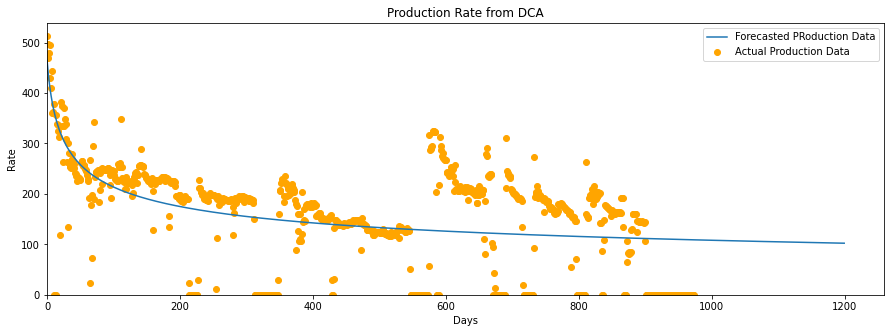

In [65]:
#Plotting Actual vs Forecasted
plt.figure(figsize=(15,5))
plt.scatter(df1['Days'],df1['BORE_OIL_VOL'],color='orange',label='Actual Production Data')
plt.plot(t_forecast,q_forecast,label='Forecasted PRoduction Data')
plt.title('Production Rate from DCA')
plt.xlabel('Days')
plt.ylabel('Rate')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.legend()
plt.show()